In [2]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime
from config import gkey

#read cleaned csv file
file_path = "Data/Clean/cleaned_data.csv"
df = pd.read_csv(file_path)
df.head()

,date,time,area,district,victim_Age,victim_sex,victim_race,premise,address,cross_street,zip,hour,month,weekday,lat,lon
0,2019-06-22,1150,Mission,1985,32.0,M,Hispanic,101.0,PARTHENIA ST,TOBIAS AV,19730.0,11,6,Friday,34.2279,-118.4516
1,2019-06-22,1600,Southwest,357,27.0,M,Hispanic,101.0,JEFFERSON,CATALINA,22724.0,16,6,Friday,34.0255,-118.2937
2,2019-06-22,650,West Valley,1001,20.0,F,Hispanic,101.0,ROSCOE,SHIRLEY,18909.0,6,6,Friday,34.2204,-118.5579
3,2019-06-22,525,Topanga,2145,44.0,F,Hispanic,101.0,VICTORY BL,SHOUP AV,4278.0,5,6,Friday,34.1865,-118.6146
4,2019-06-22,245,N Hollywood,1543,43.0,F,Hispanic,101.0,LAUREL CANYON BL,MAGNOLIA BL,8890.0,2,6,Friday,34.1649,-118.3965


array([32., 27., 20., 44., 43., nan, 40., 35., 31., 38., 21., 63., 42.,
       57., 59., 50., 33., 53., 23., 62., 18., 61., 99., 41., 25., 46.,
       47., 54., 24., 22., 66., 72., 52., 39., 28., 29., 36., 26., 30.,
       16., 60., 77., 94., 56., 48., 37., 73., 15., 49., 58., 17., 64.,
       71., 55., 45., 68., 85., 67., 19., 65., 84., 34., 70., 51., 82.,
       76., 91., 87., 13., 69., 80., 75., 83., 74., 79., 12., 81., 88.,
       14., 92., 78., 86., 11., 89., 90., 96., 93., 10., 98., 97., 95.])

## Do Asian Crash More Than Average?

In [ ]:
#get an overview of victim in race distribution
df['victim_race'].value_counts()
#bar graph
race_data = pd.DataFrame(df['victim_race'].value_counts())
fig = race_data.plot(kind='bar',color='black')
fig.set_xlabel('Ethnicity')
fig.set_yticks([])
fig.set_title('Collision Per Ethnicity')
rects = fig.patches
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va=
              'bottom')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.tick_params(axis='x', rotation=40)
#export
plta.savefig(os.path.join("figures","collision_per_ethnicity.png"))

## How Many Car Accidents Per Month?

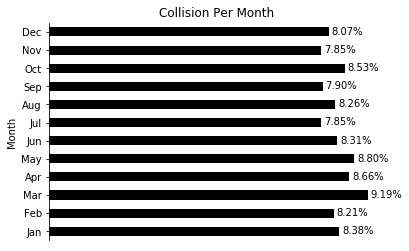

In [244]:
df1= df.copy()
# #map the month column to make it look neat
month_description = ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
# df1.month = df.month.map(month_description)


month_data = pd.DataFrame(df1.month.value_counts())
month_data= month_data.sort_index()
fig_month = month_data.plot(kind='barh',color='black')


fig_month.set_ylabel('Month')
fig_month.set_yticklabels(month_description)
fig_month.set_xticks([])
fig_month.set_title('Collision Per Month')
fig_month.spines['right'].set_visible(False)
fig_month.spines['top'].set_visible(False)
fig_month.spines['bottom'].set_visible(False)
fig_month.tick_params(axis='x', rotation=40)
fig_month.get_legend().remove()


rects=fig_month.patches
labels = df1['month'].value_counts().sort_index()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
for rect,label in zip(rects,perc_labels):
      fig_month.text(rect.get_width()*1.01,rect.get_y(),label,ha='left',va=
              'bottom')

#export
plta.savefig(os.path.join("figures","collision_month_distribution.png"))

## Calendar Heatmap

## Google Heatmap

In [92]:
# gmaps.configure(api_key=gkey)
# location = df[['lat','lon']].astype(float)
# fig = gmaps.figure()

# layer = gmaps.symbol_layer(
#     location, fill_color='rgba(0, 150, 0, 0.4)',
#     stroke_color='rgba(0, 0, 150, 0.4)', scale=2)

# fig.add_layer(layer)
# fig

Figure(layout=FigureLayout(height='420px'))